# Acinetobacter baumannii mass spectrometry data mapping

Using multiple metabolite databases to elucidate structures obtained with mass spectrometry. Data was obtained from " Untargeted metabolomics analysis reveals key pathways responsible for the synergistic killing of colistin and doripenem combination against Acinetobacter baumannii".

In [1]:
# Importing packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import string

# COBRA toolbox specific packages
from cobra import Model, Reaction, Metabolite
import cobra
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [2]:
# Loading mass spec. data into dataframe
df_AB_mass_spec_data = pd.read_csv("Acinetobacter_baumannii_mass_spec.csv")
df_AB_mass_spec_data_important_features = df_AB_mass_spec_data.loc[:, 'Mass':'Max intensity'] # extracting important features
# df_AB_mass_spec_data_important_features.head()

df_AB_mass_spec_minimal = df_AB_mass_spec_data_important_features[['Mass','Formula','Putative metabolite']] # Mass, formula, name
df_AB_mass_spec_minimal.head()

,Mass,Formula,Putative metabolite
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate
1,147.052987,C5H9NO4,L-Glutamate
2,175.095627,C6H13N3O3,L-Citrulline
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate


In [3]:
df_AB_mass_spec_data

,Mass,Retention time (min),Formula,Isomers,Putative metabolite,Confidence,Map,Pathway,Max intensity,Control_15m,...,QC10,QC11,QC2,QC3,QC4,QC5,QC6,QC7,QC8,QC9
0,189.063754,13.727944,C7H11NO5,4,N-Acetyl-L-glutamate,10.0,Amino Acid Metabolism,Arginine and proline metabolism,2337793,0.57,...,307545,332250,323385,324968,310527,279992,337366,285715,286969,268649
1,147.052987,14.314264,C5H9NO4,15,L-Glutamate,10.0,Amino Acid Metabolism,Arginine and proline metabolism__Glutamate met...,390402304,0.73,...,187876224,213315728,252706336,232989424,256952928,225940768,210877792,195959856,184354336,184390304
2,175.095627,15.704266,C6H13N3O3,3,L-Citrulline,10.0,Amino Acid Metabolism,Arginine and proline metabolism,1708569,0.72,...,597885,574857,657602,620750,521956,510704,578810,508580,581629,487456
3,221.089958,11.348637,C8H15NO6,8,N-Acetyl-D-glucosamine,10.0,Amino Acid Metabolism,Glutamate metabolism__Aminosugars metabolism,1993650,1.00,...,693513,640307,767911,707948,809951,728425,751319,850042,776495,657899
4,259.045942,12.979438,C6H14NO8P,8,D-Glucosamine 6-phosphate,10.0,Amino Acid Metabolism,Glutamate metabolism__Aminosugars metabolism,1545541,1.26,...,332898,361148,463975,370361,387690,258379,238301,76023,232233,307279
5,115.063317,12.634908,C5H9NO2,5,L-Proline,10.0,Amino Acid Metabolism,Arginine and proline metabolism__Novobiocin bi...,1148180864,0.75,...,528553312,824492288,868958720,687419136,761061120,708544192,651372096,756238976,753035904,662435264
6,131.094586,10.769482,C6H13NO2,16,L-Leucine,10.0,Amino Acid Metabolism,"Valine, leucine and isoleucine degradation__Va...",556332672,0.86,...,243780848,261177776,270771680,262360976,261043136,261243424,285583168,248888624,275161568,247497456
7,117.078934,12.324394,C5H11NO2,17,L-Valine,10.0,Amino Acid Metabolism,"Valine, leucine and isoleucine degradation__Va...",315295616,0.88,...,94435336,82928896,106987352,96700728,119056656,84054792,81680560,84327744,88038216,113193600
8,105.042676,15.553567,C3H7NO3,4,L-Serine,10.0,Amino Acid Metabolism,"Glycine, serine and threonine metabolism__Meth...",63423396,0.79,...,25039252,29065150,46995332,39998728,33383428,34749804,32157114,39308348,37709860,43564108
9,384.122018,13.487729,C14H20N6O5S,2,S-Adenosyl-L-homocysteine,10.0,Amino Acid Metabolism,Methionine metabolism,501814,1.01,...,133796,99926,96133,82740,119028,94193,95478,105055,115396,109608


# A. baumannii network reconstruction
From "Updated and standardized genome-scale reconstruction of Mycobacterium tuberculosis H37Rv, iEK1011, simulates flux states indicative of physiological conditions"

In [4]:
# Loading Acinetobacter baumannii network reconstruction 'iCN718'
AB_model=cobra.io.load_json_model('iCN718.json');

# Mass calculator 

In [5]:
# Writing function that calculates molar mass from chemical formula
def calc_mass_from_formula( formula ):
    
    # Typical mass of compounds --- assumes non-monoisotopic
    C = 12.0107 # +/- 0.0008
    H = 1.00794 # +/- 0.00001
    N = 14.0067 # +/- 0.0001
    O = 15.9994 # +/-
    P = 30.973762 # +/- 0.000002
    S =  32.065 # +/- 0.005

    # Initializing new string for first round of alteration (i.e., adding the '+')
    new_str = ''

    # Adding a '+' before every element
    for index in range (0, len(formula)):
        temp_str = formula[index]
        if temp_str.isalpha():
            new_str = new_str + '+' + temp_str 
        elif temp_str.isnumeric():
            new_str = new_str + temp_str
            
    # Removing the '+' at teh beginning of each string
    if new_str[0] == '+':
        str_formula_add = new_str[1:]

    # Initializing new string for second round of alteration (i.e., adding the '*')
    final_str_formula = ''

    # Adding a '*' after each element that is followed by a number
    for index in range(0,len(str_formula_add)):
        temp_str_1 = str_formula_add[index]
        if index != len(str_formula_add)-1:
            temp_str_2 = str_formula_add[index + 1]
        if temp_str_1.isalpha() and temp_str_2.isnumeric():
            final_str_formula = final_str_formula + temp_str_1 + '*'
        else: 
            final_str_formula = final_str_formula + temp_str_1

    # Evaludating string expression and returning molecular mass to user
    molecular_mass = eval(final_str_formula)    
    return molecular_mass



In [6]:
# Test case of function (output should be 189.1659 )
mass = calc_mass_from_formula('C7H11NO5')
print(mass)

189.16593999999998


# Parsing A. baumannii - specific database (from biocyc)


In [7]:
# Parsing data A_Baumannii file containing compounds

with open('A_Baumannii_compounds.txt') as f:
    # counter = 0
    # common_name = []
    # inchi = []
    # mono_mw = []
    start = False
    compounds = []
    for line in f:
        if line.strip().split()[0] =='UNIQUE-ID':
            start = True
            compound = {'COMMON-NAME':'','INCHI':'', 'MONOISOTOPIC-MW':0}
        if line.strip() == '//':
            start = False
            compounds.append(list(compound.values()))
        if start:
            line = line.strip().split()
            if line[0] == 'COMMON-NAME':
                compound['COMMON-NAME'] = ''.join(line[2:])
            if line[0] == 'INCHI':
                compound['INCHI'] = line[2].split('/')[1]
            if line[0] == 'MONOISOTOPIC-MW':
                compound['MONOISOTOPIC-MW'] = line[2]
    print(len(compounds))                    
    print(compounds[0])

1216
['322.0123269261', 'C11H12Cl2N2O5', 'chloramphenicol']


In [8]:
compounds


[['322.0123269261', 'C11H12Cl2N2O5', 'chloramphenicol'],
 ['2081.1845825124',
  'C100H182N2O38P2',
  'KDO<SUB>2</SUB>-(palmitoleoyl)-lipidIV<SUB>A</SUB>'],
 ['43.0058136594', 'CHNO', 'cyanate'],
 ['152.0473441231', 'C8H8O3', '4-hydroxyphenylacetate'],
 ['1003.2200673676001',
  'C34H52N7O20P3S',
  '3-[(3a<i>S</i>,4<i>S</i>,5<i>R</i>,7a<i>S</i>)-5-hydroxy-7a-methyl-1-oxo-octahydro-1<i>H</i>-inden-4-yl]-3-oxopropanoyl-CoA'],
 ['1005.2357174318',
  'C34H54N7O20P3S',
  '3-[(3a<i>S</i>,4<i>S</i>,5<i>R</i>,7a<i>S</i>)-5-hydroxy-7a-methyl-1-oxo-octahydro-1<i>H</i>-inden-4-yl]-3-hydroxypropanoyl-CoA'],
 ['971.1574671108', 'C32H44N7O20P3S', 'benzoylsuccinyl-CoA'],
 ['973.1731171749999',
  'C32H46N7O20P3S',
  '2-carboxymethyl-3-hydroxyphenylpropionyl-CoA'],
 ['18.0105646863', 'H2O', 'H<sub>2</sub>O'],
 ['929.1469024244999', 'C30H42N7O19P3S', '4-hydroxybenzoyl-acetyl-CoA'],
 ['931.1625524887',
  'C30H44N7O19P3S',
  '3-(4-hydroxyphenyl)-3-hydroxy-propionyl-CoA'],
 ['43.989829244199996', 'CO2', 'CO<

In [9]:
# Create new dataframe for comparison
df_AB_mass_spec_mapping = df_AB_mass_spec_minimal.copy()
df_AB_mass_spec_mapping['mapped_MW'] = ''
df_AB_mass_spec_mapping['mapped_formula'] = ''
df_AB_mass_spec_mapping['mapped_metabs'] = ''

df_AB_mass_spec_mapping

# df_AB_mass_spec_mapping.loc[1,'mapped_MW'] = 'test'
# df_AB_mass_spec_mapping

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,,,
1,147.052987,C5H9NO4,L-Glutamate,,,
2,175.095627,C6H13N3O3,L-Citrulline,,,
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,,,
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,,,
5,115.063317,C5H9NO2,L-Proline,,,
6,131.094586,C6H13NO2,L-Leucine,,,
7,117.078934,C5H11NO2,L-Valine,,,
8,105.042676,C3H7NO3,L-Serine,,,
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,,,


In [10]:
# List of candidates 
# ppm = mass error / exact mass * 10^6

counter = 0

for mass_measured in df_AB_mass_spec_mapping['Mass']:
    candidate_metabs_mass = []
    candidate_metabs_formula = []
    candidate_metabs_name = []
    for compound in compounds:
        
        candidate_mass = compound[0]
        candidate_formula = compound[1]
        candidate_name = compound[2]
        
        if float(candidate_mass) > 0.1:
            error_ppm =  (abs((float(candidate_mass) - mass_measured)) / float(candidate_mass)) * (10**6)
        else:
            error_ppm = 1000000
        
        # Applying 5ppm error threshold 
        if error_ppm < 25:
            candidate_metabs_mass.append(candidate_mass)
            candidate_metabs_formula.append(candidate_formula)
            candidate_metabs_name.append(candidate_name)
            # print('got one') - verification that threshold is working to work
            
    candidate_metabs_mass_comb = ', '.join(map(str,candidate_metabs_mass))
    candidate_metabs_formula_comb = ', '.join(map(str,candidate_metabs_formula))
    candidate_metabs_name_comb = ', '.join(map(str,candidate_metabs_name))
    
#     if len(candidate_metabs_mass_comb) > 2:
#         test =candidate_metabs_mass
    
    df_AB_mass_spec_mapping.loc[counter,'mapped_MW'] = candidate_metabs_mass_comb
    df_AB_mass_spec_mapping.loc[counter,'mapped_formula'] = candidate_metabs_formula_comb
    df_AB_mass_spec_mapping.loc[counter,'mapped_metabs'] = candidate_metabs_name_comb
    
    counter += 1


# Displaying mapped dataframe
df_AB_mass_spec_mapping   

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,"189.0637224688, 189.0637224688","C7H11NO5, C7H11NO5","L-&alpha;-amino-&epsilon;-keto-pimelate, <i>N<..."
1,147.052987,C5H9NO4,L-Glutamate,"147.0531577825, 147.0531577825, 147.0531577825...","C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4","<i>O</i>-acetyl-L-serine, L-glutamate, D-gluta..."
2,175.095627,C6H13N3O3,L-Citrulline,175.0956912992,C6H13N3O3,L-citrulline
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,"221.0899372193, 221.0899372193","C8H15NO6, C8H15NO6","<i>N</i>-acetyl-&beta;-D-glucosamine, <i>N</i>..."
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,"259.0457029414, 259.0457029414","C6H14NO8P, C6H14NO8P","D-glucosamine1-phosphate, glycerophosphoserine"
5,115.063317,C5H9NO2,L-Proline,"115.0633285383, 115.0633285383","C5H9NO2, C5H9NO2","L-proline, D-proline"
6,131.094586,C6H13NO2,L-Leucine,"131.0946286667, 131.0946286667","C6H13NO2, C6H13NO2","L-leucine, L-isoleucine"
7,117.078934,C5H11NO2,L-Valine,"117.0789786025, 117.0789786025","C5H11NO2, C5H11NO2","5-aminopentanoate, L-valine"
8,105.042676,C3H7NO3,L-Serine,"105.0425930962, 105.0425930962","C3H7NO3, C3H7NO3","L-serine, D-serine"
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,384.1215884737,C14H20N6O5S,<i>S</i>-adenosyl-L-homocysteine


In [11]:
# Creating list with number of mapped matches

metab_matches = []

for mapped_metab in df_AB_mass_spec_mapping['mapped_metabs']:
    # print(mapped_metab)
    if len(mapped_metab) == 0:
        metab_matches.append(len(mapped_metab))
    else: 
        temp_metabs = mapped_metab.split(', ')
        temp_matches = len(temp_metabs)
        metab_matches.append(temp_matches)

In [12]:
metab_matches.count(0)

1327

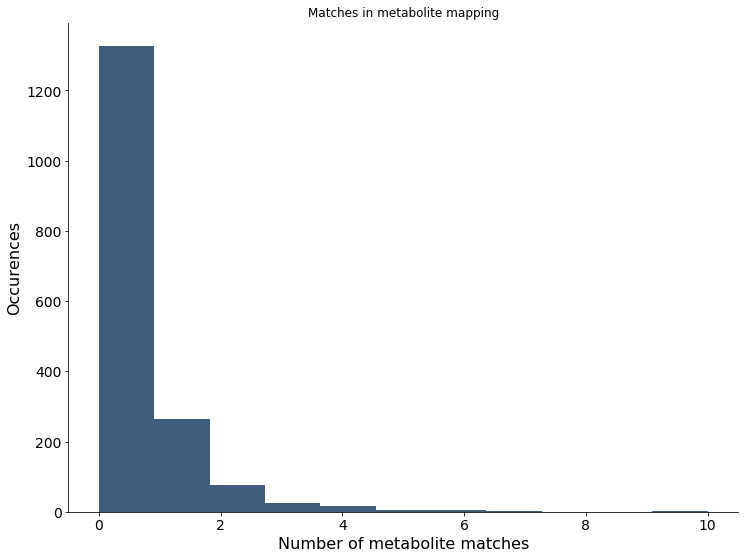

In [13]:
plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

plt.xticks(fontsize=14)  
plt.yticks(range(0, 1347, 200), fontsize=14) 

plt.xlabel("Number of metabolite matches", fontsize=16)  
plt.ylabel("Occurences", fontsize=16)

plt.title('Matches in metabolite mapping')

plt.hist(metab_matches,  
         color="#3F5D7D", bins=11) 

plt.show()

In [14]:
# Bring 0-matches value down --- look for databases on KEGG and HMDB

LCMS_meausred_masses = df_AB_mass_spec_mapping['Mass']
type(LCMS_meausred_masses)
LCMS_meausred_masses.to_csv('LCMS_meausred_masses.csv')

# Using MetCyc database

In [15]:
# Parsing data A_Baumannii file containing compounds

with open('compounds.dat') as f:
    # counter = 0
    # common_name = []
    # inchi = []
    # mono_mw = []
    start = False
    compounds_MC = []
    for line in f:
        if line.strip().split()[0] =='UNIQUE-ID':
            start = True
            compound_MC = {'COMMON-NAME':'','INCHI':'', 'MONOISOTOPIC-MW':0}
        if line.strip() == '//':
            start = False
            compounds_MC.append(list(compound_MC.values()))
        if start:
            line = line.strip().split()
            if line[0] == 'COMMON-NAME':
                compound_MC['COMMON-NAME'] = ''.join(line[2:])
            if line[0] == 'INCHI':
                compound_MC['INCHI'] = line[2].split('/')[1]
            if line[0] == 'MONOISOTOPIC-MW':
                compound_MC['MONOISOTOPIC-MW'] = line[2]
    # print(len(compounds))                    
    # print(compounds[0])

In [16]:
compounds_MC

[['186.02767131349998',
  'C6H4N2O5',
  'O-[5-(oxidonitroso)-4-oxocyclohex-2-en-1-ylidenenitroso]oxidanidolate'],
 ['232.02057456289998', 'C6H3N3O7', '2,4,6-trinitrophenol'],
 ['232.02057456289998',
  'C6H3N3O7',
  'O-[3-nitro-5-(oxidonitroso)-4-oxocyclohex-2-en-1-ylidenenitroso]oxidanidolate'],
 ['433.8511947452', 'C9H8I2O4', 'diiodo-4-hydroxyphenyl-lactate'],
 ['190.05897144189998', 'C6H8N2O5', '2,4-dinitrocyclohexan-1-one'],
 ['431.835544681', 'C9H6I2O4', 'diiodo-4-hydroxyphenylpyruvate'],
 ['186.02767131349998', 'C6H4N2O5', '2,4-dinitrophenol'],
 ['433.9375948824', 'C9H12IN2O8P', "5-iodo-2'-dUMP"],
 ['234.0362246271',
  'C6H5N3O7',
  'O-[5-(hydroxynitroso)-3-(oxidonitroso)-2-oxocyclohexylidenenitroso]oxidanidolate'],
 ['433.9797206703',
  'C14H15IN2O4S',
  '5-((2-iodoacetamido)ethyl)-1-aminonapthalenesulfate'],
 ['234.0362246271',
  'C6H5N3O7',
  'O-[5-nitro-3-(oxidonitroso)-2-oxocyclohexylidenenitroso]oxidanidolate'],
 ['495.86684480939994',
  'C14H10I2O4',
  '4-(4-hydroxyphenoxy)

In [17]:
# Create new dataframe for comparison
df_AB_mass_spec_mapping_MC = df_AB_mass_spec_minimal.copy()
df_AB_mass_spec_mapping_MC['mapped_MW'] = ''
df_AB_mass_spec_mapping_MC['mapped_formula'] = ''
df_AB_mass_spec_mapping_MC['mapped_metabs'] = ''

df_AB_mass_spec_mapping_MC

# df_AB_mass_spec_mapping.loc[1,'mapped_MW'] = 'test'
# df_AB_mass_spec_mapping

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,,,
1,147.052987,C5H9NO4,L-Glutamate,,,
2,175.095627,C6H13N3O3,L-Citrulline,,,
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,,,
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,,,
5,115.063317,C5H9NO2,L-Proline,,,
6,131.094586,C6H13NO2,L-Leucine,,,
7,117.078934,C5H11NO2,L-Valine,,,
8,105.042676,C3H7NO3,L-Serine,,,
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,,,


In [18]:
# List of candidates 
# ppm = mass error / exact mass * 10^6

counter = 0

for mass_measured_MC in df_AB_mass_spec_mapping_MC['Mass']:
    candidate_metabs_mass_MC = []
    candidate_metabs_formula_MC = []
    candidate_metabs_name_MC = []
    for compound_MC in compounds_MC:
        
        candidate_mass_MC = compound_MC[0]
        candidate_formula_MC = compound_MC[1]
        candidate_name_MC = compound_MC[2]
        
        if float(candidate_mass_MC) > 0.1:
            error_ppm =  (abs((float(candidate_mass_MC) - mass_measured_MC)) / float(candidate_mass_MC)) * (10**6)
        else:
            error_ppm = 1000000
        
        # Applying 5ppm error threshold 
        if error_ppm < 25:
            candidate_metabs_mass_MC.append(candidate_mass_MC)
            candidate_metabs_formula_MC.append(candidate_formula_MC)
            candidate_metabs_name_MC.append(candidate_name_MC)
            # print('got one') - verification that threshold is working to work
            
    candidate_metabs_mass_comb_MC = ', '.join(map(str,candidate_metabs_mass_MC))
    candidate_metabs_formula_comb_MC = ', '.join(map(str,candidate_metabs_formula_MC))
    candidate_metabs_name_comb_MC = ', '.join(map(str,candidate_metabs_name_MC))
    
#     if len(candidate_metabs_mass_comb) > 2:
#         test =candidate_metabs_mass
    
    df_AB_mass_spec_mapping_MC.loc[counter,'mapped_MW'] = candidate_metabs_mass_comb_MC
    df_AB_mass_spec_mapping_MC.loc[counter,'mapped_formula'] = candidate_metabs_formula_comb_MC
    df_AB_mass_spec_mapping_MC.loc[counter,'mapped_metabs'] = candidate_metabs_name_comb_MC
    
    counter += 1


# Displaying mapped dataframe
df_AB_mass_spec_mapping_MC

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,189.0637224688,C7H11NO5,<i>N</i>-acetyl-L-glutamate
1,147.052987,C5H9NO4,L-Glutamate,"147.0531577825, 147.0531577825","C5H9NO4, C5H9NO4","<i>N</i>-acetyl-L-serine, N-hydroxy-N-isopropy..."
2,175.095627,C6H13N3O3,L-Citrulline,175.0997140446,C11H13NO,"4-<i>trans</i>-(<i>N,N</i>-dimethylamino)cinna..."
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,"221.092617294, 221.092617294, 221.092617294, 2...","C11H12N2O3, C11H12N2O3, C11H12N2O3, C11H12N2O3...","9-<i>N</i>-hydroxy-L-tryptophan, (S)-&beta;-hy..."
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,259.0410512889,C4H9.Hg,<i>sec</i>-butylmercury
5,115.063317,C5H9NO2,L-Proline,115.0633285383,C5H9NO2,3-acetamidopropanal
6,131.094586,C6H13NO2,L-Leucine,"131.0946286667, 131.0946286667","C6H13NO2, C6H13NO2","<i>N</i>-(3-hydroxybutan-2-yl)acetamide, 2-mor..."
7,117.078934,C5H11NO2,L-Valine,,,
8,105.042676,C3H7NO3,L-Serine,,,
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,"384.1267762356, 384.12090299669995, 384.126776...","C14H24O12, C21H20O7, C14H24O12, C21H20O7, C14H...",6-<i>O</i>-acetyl-&alpha;-D-glucopyranosyl-(1&...


In [19]:
# Creating list with number of mapped matches

metab_matches_MC = []

for mapped_metab_MC in df_AB_mass_spec_mapping_MC['mapped_metabs']:
    # print(mapped_metab)
    if len(mapped_metab_MC) == 0:
        metab_matches_MC.append(len(mapped_metab_MC))
    else: 
        temp_metabs_MC = mapped_metab_MC.split(', ')
        temp_matches_MC = len(temp_metabs_MC)
        metab_matches_MC.append(temp_matches_MC)

In [20]:
metab_matches_MC.index(74)
df_AB_mass_spec_mapping_MC.loc[118, "mapped_metabs"]

'&beta;-L-idopyranose, &beta;-D-galactofuranose, &alpha;-D-galactofuranose, D-hamamelose, theophylline, D-fuconate, &alpha;-D-mannopyranose, L-rhamnonate, 2-deoxygluconate, &beta;-D-mannopyranose, L-glucose, &beta;-L-mannose, &alpha;-L-mannose, theobromine, paraxanthine, L-fuconate, &beta;-L-fructofuranose, &alpha;-L-fructofuranose, &alpha;-L-galactose, &beta;-L-fructopyranose, &alpha;-L-fructopyranose, &beta;-D-fructopyranose, &alpha;-D-fructopyranose, &alpha;-D-talose, L-<i>xylo</i>-3-hexulose, &beta;-L-galactose, <i>scyllo</i>-inositol, 1D-<i>chiro</i>-inositol, <i>aldehydo</i>-D-mannose, <i>aldehydo</i>-D-glucose, <i>keto</i>-D-tagatose, <i>keto</i>-D-psicose, <i>keto</i>-D-sorbose, &alpha;-D-fructofuranose, <i>keto</i>-D-fructose, <i>aldehydo</i>-L-mannose, &beta;-D-fructofuranose, &alpha;-D-galactose, &beta;-D-galactose, <I>myo</I>-inositol, <i>aldehydo</i>-D-galactose, <i>keto</i>-L-sorbose, <i>aldehydo</i>-D-gulose, &alpha;-D-gulose, &beta;-D-gulose, &alpha;-L-gulose, &beta;-L-

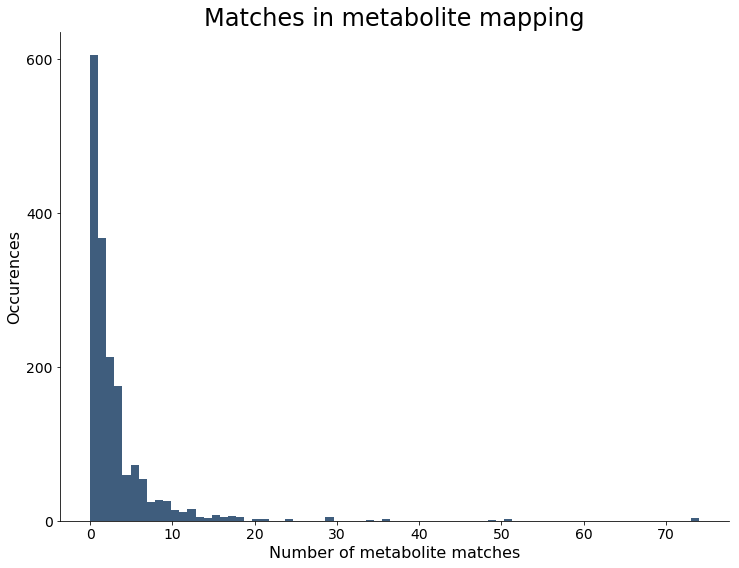

In [21]:
plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

plt.xticks(fontsize=14)  
plt.yticks(range(0, 650, 200), fontsize=14) 

plt.xlabel("Number of metabolite matches", fontsize=16)  
plt.ylabel("Occurences", fontsize=16)

plt.title('Matches in metabolite mapping', fontsize=24)

plt.hist(metab_matches_MC,  
         color="#3F5D7D",bins = 75) 

plt.show()

# BioCyc + MetCyc

In [175]:
compounds_mixed = compounds + compounds_MC

compounds_mixed

[['322.0123269261', 'chloramphenicol', 'C11H12Cl2N2O5'],
 ['2081.1845825124',
  'KDO<SUB>2</SUB>-(palmitoleoyl)-lipidIV<SUB>A</SUB>',
  'C100H182N2O38P2'],
 ['43.0058136594', 'cyanate', 'CHNO'],
 ['152.0473441231', '4-hydroxyphenylacetate', 'C8H8O3'],
 ['1003.2200673676001',
  '3-[(3a<i>S</i>,4<i>S</i>,5<i>R</i>,7a<i>S</i>)-5-hydroxy-7a-methyl-1-oxo-octahydro-1<i>H</i>-inden-4-yl]-3-oxopropanoyl-CoA',
  'C34H52N7O20P3S'],
 ['1005.2357174318',
  '3-[(3a<i>S</i>,4<i>S</i>,5<i>R</i>,7a<i>S</i>)-5-hydroxy-7a-methyl-1-oxo-octahydro-1<i>H</i>-inden-4-yl]-3-hydroxypropanoyl-CoA',
  'C34H54N7O20P3S'],
 ['971.1574671108', 'benzoylsuccinyl-CoA', 'C32H44N7O20P3S'],
 ['973.1731171749999',
  '2-carboxymethyl-3-hydroxyphenylpropionyl-CoA',
  'C32H46N7O20P3S'],
 ['18.0105646863', 'H<sub>2</sub>O', 'H2O'],
 ['929.1469024244999', '4-hydroxybenzoyl-acetyl-CoA', 'C30H42N7O19P3S'],
 ['931.1625524887',
  '3-(4-hydroxyphenyl)-3-hydroxy-propionyl-CoA',
  'C30H44N7O19P3S'],
 ['43.989829244199996', 'CO<SUB>2</

In [174]:
compounds == compounds_MC

False

In [176]:
# Create new dataframe for comparison
df_AB_mass_spec_mapping_mixed = df_AB_mass_spec_minimal.copy()
df_AB_mass_spec_mapping_mixed['mapped_MW'] = ''
df_AB_mass_spec_mapping_mixed['mapped_formula'] = ''
df_AB_mass_spec_mapping_mixed['mapped_metabs'] = ''

df_AB_mass_spec_mapping_mixed

# df_AB_mass_spec_mapping.loc[1,'mapped_MW'] = 'test'
# df_AB_mass_spec_mapping

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,,,
1,147.052987,C5H9NO4,L-Glutamate,,,
2,175.095627,C6H13N3O3,L-Citrulline,,,
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,,,
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,,,
5,115.063317,C5H9NO2,L-Proline,,,
6,131.094586,C6H13NO2,L-Leucine,,,
7,117.078934,C5H11NO2,L-Valine,,,
8,105.042676,C3H7NO3,L-Serine,,,
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,,,


In [178]:
# List of candidates 
# ppm = mass error / exact mass * 10^6

counter = 0

for mass_measured_mixed in df_AB_mass_spec_mapping_mixed['Mass']:
    candidate_metabs_mass_mixed = []
    candidate_metabs_formula_mixed = []
    candidate_metabs_name_mixed = []
    for compound_mixed in compounds_mixed:
        
        candidate_mass_mixed = compound_mixed[0]
        candidate_formula_mixed = compound_mixed[1]
        candidate_name_mixed = compound_mixed[2]
        
        if float(candidate_mass_mixed) > 0.1:
            error_ppm =  (abs((float(candidate_mass_mixed) - mass_measured_mixed)) / float(candidate_mass_mixed)) * (10**6)
        else:
            error_ppm = 1000000
        
        # Applying 5ppm error threshold 
        if error_ppm < 25:
            candidate_metabs_mass_mixed.append(candidate_mass_mixed)
            candidate_metabs_formula_mixed.append(candidate_formula_mixed)
            candidate_metabs_name_mixed.append(candidate_name_mixed)
            # print('got one') - verification that threshold is working to work
            
    candidate_metabs_mass_comb_mixed = ', '.join(map(str,candidate_metabs_mass_mixed))
    candidate_metabs_formula_comb_mixed = ', '.join(map(str,candidate_metabs_formula_mixed))
    candidate_metabs_name_comb_mixed = ', '.join(map(str,candidate_metabs_name_mixed))
    
#     if len(candidate_metabs_mass_comb) > 2:
#         test =candidate_metabs_mass
    
    df_AB_mass_spec_mapping_mixed.loc[counter,'mapped_MW'] = candidate_metabs_mass_comb_mixed
    df_AB_mass_spec_mapping_mixed.loc[counter,'mapped_formula'] = candidate_metabs_formula_comb_mixed
    df_AB_mass_spec_mapping_mixed.loc[counter,'mapped_metabs'] = candidate_metabs_name_comb_mixed
    
    counter += 1


# Displaying mapped dataframe
df_AB_mass_spec_mapping_mixed

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,"189.0637224688, 189.0637224688, 189.0637224688","L-&alpha;-amino-&epsilon;-keto-pimelate, <i>N<...","C7H11NO5, C7H11NO5, C7H11NO5"
1,147.052987,C5H9NO4,L-Glutamate,"147.0531577825, 147.0531577825, 147.0531577825...","<i>O</i>-acetyl-L-serine, L-glutamate, D-gluta...","C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4, C..."
2,175.095627,C6H13N3O3,L-Citrulline,"175.0956912992, 175.0997140446","L-citrulline, 4-<i>trans</i>-(<i>N,N</i>-dimet...","C6H13N3O3, C11H13NO"
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,"221.0899372193, 221.0899372193, 221.092617294,...","<i>N</i>-acetyl-&beta;-D-glucosamine, <i>N</i>...","C8H15NO6, C8H15NO6, C11H12N2O3, C11H12N2O3, C1..."
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,"259.0457029414, 259.0457029414, 259.0410512889","D-glucosamine1-phosphate, glycerophosphoserine...","C6H14NO8P, C6H14NO8P, C4H9.Hg"
5,115.063317,C5H9NO2,L-Proline,"115.0633285383, 115.0633285383, 115.0633285383","L-proline, D-proline, 3-acetamidopropanal","C5H9NO2, C5H9NO2, C5H9NO2"
6,131.094586,C6H13NO2,L-Leucine,"131.0946286667, 131.0946286667, 131.0946286667...","L-leucine, L-isoleucine, <i>N</i>-(3-hydroxybu...","C6H13NO2, C6H13NO2, C6H13NO2, C6H13NO2"
7,117.078934,C5H11NO2,L-Valine,"117.0789786025, 117.0789786025","5-aminopentanoate, L-valine","C5H11NO2, C5H11NO2"
8,105.042676,C3H7NO3,L-Serine,"105.0425930962, 105.0425930962","L-serine, D-serine","C3H7NO3, C3H7NO3"
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,"384.1215884737, 384.1267762356, 384.1209029966...","<i>S</i>-adenosyl-L-homocysteine, 6-<i>O</i>-a...","C14H20N6O5S, C14H24O12, C21H20O7, C14H24O12, C..."


In [179]:
# Creating list with number of mapped matches

metab_matches_mixed = []

for mapped_metab_mixed in df_AB_mass_spec_mapping_mixed['mapped_metabs']:
    # print(mapped_metab)
    if len(mapped_metab_mixed) == 0:
        metab_matches_mixed.append(len(mapped_metab_mixed))
    else: 
        temp_metabs_mixed = mapped_metab_mixed.split(', ')
        temp_matches_mixed = len(temp_metabs_mixed)
        metab_matches_mixed.append(temp_matches_mixed)

In [180]:
max(metab_matches_mixed)

80

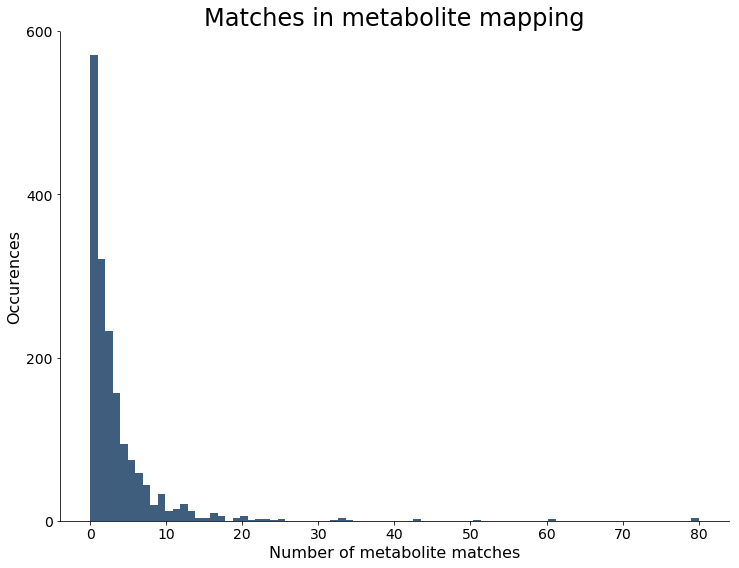

In [182]:
plt.figure(figsize=(12, 9))  

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

plt.xticks(fontsize=14)  
plt.yticks(range(0, 650, 200), fontsize=14) 

plt.xlabel("Number of metabolite matches", fontsize=16)  
plt.ylabel("Occurences", fontsize=16)

plt.title('Matches in metabolite mapping', fontsize=24)

plt.hist(metab_matches_mixed,  
         color="#3F5D7D",bins = 81) 

plt.show()

# Less 0 matches, but also less singular matches 

# Pathway determination 

In [53]:
# Creating new dataframe with pathways
df_AB_mass_spec_mapping_pathways = df_AB_mass_spec_mapping.copy()
df_AB_mass_spec_mapping_pathways['pathway'] = ''

df_AB_mass_spec_mapping_pathways['pathway'] = df_AB_mass_spec_data.loc[:, 'Pathway']
df_AB_mass_spec_mapping_pathways['mapped_metabs'].loc[1693]



''

In [78]:
df_AB_mass_spec_mapping_pathways

,Mass,Formula,Putative metabolite,mapped_MW,mapped_formula,mapped_metabs,pathway
0,189.063754,C7H11NO5,N-Acetyl-L-glutamate,"189.0637224688, 189.0637224688","C7H11NO5, C7H11NO5","L-&alpha;-amino-&epsilon;-keto-pimelate, <i>N<...",Arginine and proline metabolism
1,147.052987,C5H9NO4,L-Glutamate,"147.0531577825, 147.0531577825, 147.0531577825...","C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4, C5H9NO4","<i>O</i>-acetyl-L-serine, L-glutamate, D-gluta...",Arginine and proline metabolism__Glutamate met...
2,175.095627,C6H13N3O3,L-Citrulline,175.0956912992,C6H13N3O3,L-citrulline,Arginine and proline metabolism
3,221.089958,C8H15NO6,N-Acetyl-D-glucosamine,"221.0899372193, 221.0899372193","C8H15NO6, C8H15NO6","<i>N</i>-acetyl-&beta;-D-glucosamine, <i>N</i>...",Glutamate metabolism__Aminosugars metabolism
4,259.045942,C6H14NO8P,D-Glucosamine 6-phosphate,"259.0457029414, 259.0457029414","C6H14NO8P, C6H14NO8P","D-glucosamine1-phosphate, glycerophosphoserine",Glutamate metabolism__Aminosugars metabolism
5,115.063317,C5H9NO2,L-Proline,"115.0633285383, 115.0633285383","C5H9NO2, C5H9NO2","L-proline, D-proline",Arginine and proline metabolism__Novobiocin bi...
6,131.094586,C6H13NO2,L-Leucine,"131.0946286667, 131.0946286667","C6H13NO2, C6H13NO2","L-leucine, L-isoleucine","Valine, leucine and isoleucine degradation__Va..."
7,117.078934,C5H11NO2,L-Valine,"117.0789786025, 117.0789786025","C5H11NO2, C5H11NO2","5-aminopentanoate, L-valine","Valine, leucine and isoleucine degradation__Va..."
8,105.042676,C3H7NO3,L-Serine,"105.0425930962, 105.0425930962","C3H7NO3, C3H7NO3","L-serine, D-serine","Glycine, serine and threonine metabolism__Meth..."
9,384.122018,C14H20N6O5S,S-Adenosyl-L-homocysteine,384.1215884737,C14H20N6O5S,<i>S</i>-adenosyl-L-homocysteine,Methionine metabolism


In [69]:
# Creating set of pathways

pathway_list = []
for pathway in df_AB_mass_spec_mapping_pathways['pathway']:
    temp_pathways = str(pathway)
    if '__' in temp_pathways: # '__' was used to split pathways in Excel spreadsheet
        pathway_split = temp_pathways.split('__')
        for index in range(len(pathway_split)):
            pathway_list.append(pathway_split[index])
    else:
        pathway_list.append(temp_pathways)
pathway_set = set(pathway_list)
        
# Cleaning-up set (removing missed case with multiple pathway and removing empty space if present)
pathway_list_final = []
for pathway in pathway_set:
    if pathway == 'Glutathione metabolism_Butanoate metabolism_C5-Branched dibasic acid metabolism_Porphyrin and chlorophyll metabolism_Nitrogen metabolism':
        print('removed') # tell me when missed case is removed
    elif pathway[0] == ' ':
        if pathway[-1] == ' ':
            pathway_list_final.append(pathway[1:-1])
        else: 
            pathway_list_final.append(pathway[1:])
    elif pathway[-1] == ' ':
        if pathway[0] == ' ':
            pathway_list_final.append(pathway[1:-1])
        else: 
            pathway_list_final.append(pathway[:-1])        
    else:
        pathway_list_final.append(pathway)
        
pathway_set_final = sorted(set(pathway_list_final))


# Creating a set of pathway stemming from the original data set
# pathway_list = []
# for pathway in df_AB_mass_spec_mapping_pathways['pathway']:
#     temp_pathways = str(pathway)
#     if '__' in temp_pathways: # '__' was used to split pathways in Excel spreadsheet
#         pathway_split = temp_pathways.split('__')
#         for index in range(len(pathway_split)):
#             pathway_list.append(pathway_split[index])
#     else:
#         pathway_list.append(temp_pathways)
# pathway_set = set(pathway_list)
        
# # Cleaning-up set (removing missed case with multiple pathway and removing empty space if present)
# pathway_list_final = []
# for pathway in pathway_set:
#     if pathway == 'Glutathione metabolism_Butanoate metabolism_C5-Branched dibasic acid metabolism_Porphyrin and chlorophyll metabolism_Nitrogen metabolism':
#         print('removed') # tell me when missed case is removed
#     elif pathway[0] == ' ':
#         pathway_list_final.append(pathway[1:])
#     else:
#         pathway_list_final.append(pathway)
        
# pathway_set_final = sorted(set(pathway_list_final))

    

removed


In [70]:
pathway_set_final

['(5R)-carbapenem biosynthesis',
 '0',
 '1,4-Dichlorobenzene degradation',
 '1- and 2-Methylnaphthalene degradation',
 '13-LOX and 13-HPL pathway',
 '2,4-Dichlorobenzoate degradation',
 '3-methylquinoline degradation',
 'Acidic peptide',
 'Acridone alkaloid biosynthesis',
 'Alanine and aspartate metabolism',
 'Alkaloid biosynthesis I',
 'Alkaloid biosynthesis II',
 'Amino Fatty Acids',
 'Aminophosphonate metabolism',
 'Aminosugars metabolism',
 'Arginine and proline metabolism',
 'Ascorbate and aldarate metabolism',
 'BaseExcisionRepair',
 'Basic peptide',
 'Benzoate degradation via CoA ligation',
 'Benzoate degradation via hydroxylation',
 'Benzoxazinone biosynthesis',
 'Bile acid biosynthesis',
 'Biosynthesis of ansamycins',
 'Biosynthesis of siderophore group nonribosomal peptides',
 'Biosynthesis of steroids',
 'Biosynthesis of unsaturated fatty acids',
 'Biosynthesis of vancomycin group antibiotics',
 'Biotin metabolism',
 'Biphenyl degradation',
 'Bisphenol A degradation',
 'Buta

In [108]:
# Counting pathways and how many were missed 

pathway_analysis_list = []

for pathway in pathway_set_final:
    Actual_instances = 0
    Measured_instances = 0
    counter = 0
    
    pathway_dict = {'pathway':pathway,'Actual instances':0, 'Meausred instances':0, 'Percentage_captured':0}
    for pathway_options in df_AB_mass_spec_mapping_pathways['pathway']:
        if pathway in pathway_options:
            Actual_instances += 1
            if df_AB_mass_spec_mapping_pathways.loc[counter,'mapped_formula'] == '':
                pass
            else:
                Measured_instances += 1
            counter += 1
    
    pathway_dict['Actual instances'] = int(Actual_instances)
    pathway_dict['Meausred instances'] = int(Measured_instances)
    pathway_dict['Percentage_captured'] = float(Measured_instances)/float(Actual_instances) * 100 
    
    pathway_analysis_list.append(pathway_dict)


In [118]:
pathway_analysis_df = pd.DataFrame()
for index in range(len(pathway_analysis_list)):
    pathway_analysis_df = pathway_analysis_df.append(pathway_analysis_list[index], ignore_index = True)
# pathway_analysis_df

cols = pathway_analysis_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
pathway_analysis_df = pathway_analysis_df[cols]
pathway_analysis_df

,pathway,Actual instances,Meausred instances,Percentage_captured
0,(5R)-carbapenem biosynthesis,2.0,2.0,100.000000
1,0,546.0,230.0,42.124542
2,"1,4-Dichlorobenzene degradation",2.0,2.0,100.000000
3,1- and 2-Methylnaphthalene degradation,1.0,1.0,100.000000
4,13-LOX and 13-HPL pathway,1.0,1.0,100.000000
5,"2,4-Dichlorobenzoate degradation",4.0,4.0,100.000000
6,3-methylquinoline degradation,5.0,5.0,100.000000
7,Acidic peptide,48.0,47.0,97.916667
8,Acridone alkaloid biosynthesis,1.0,1.0,100.000000
9,Alanine and aspartate metabolism,14.0,14.0,100.000000


In [119]:
pathway_analysis_df.to_csv('pathway_analysis_final.csv')